In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [55]:
pl_df = pd.read_csv("/Users/lewisclark/Desktop/PROJECTS/final_project/sheets_data/MASTER_DATA/final_master_pl.csv")
ll_df = pd.read_csv("/Users/lewisclark/Desktop/PROJECTS/final_project/sheets_data/MASTER_DATA/final_master_ll.csv")
bd_df = pd.read_csv("/Users/lewisclark/Desktop/PROJECTS/final_project/sheets_data/MASTER_DATA/final_master_bd.csv")
sa_df = pd.read_csv("/Users/lewisclark/Desktop/PROJECTS/final_project/sheets_data/MASTER_DATA/final_master_sa.csv")
l1_df = pd.read_csv("/Users/lewisclark/Desktop/PROJECTS/final_project/sheets_data/MASTER_DATA/final_master_l1.csv")

In [58]:
l1_df.head()

,Squad,Poss,90s,Gls,Ast,G_plus_A,G_minus_PK,xG,xAG,xG_plus_xAG,npxG_plus_xAG,PrgC,PrgP,CrdY,CrdR,Season,League,League_ID
0,Angers,41.2,34,0.91,0.50,1.41,0.76,1.06,0.69,1.75,1.61,502,953,49,2,2024-25,Ligue 1,5
1,Auxerre,42.5,34,1.38,1.03,2.41,1.26,1.21,0.94,2.15,2.04,484,1084,68,4,2024-25,Ligue 1,5
2,Brest,48.4,34,1.53,0.94,2.47,1.32,1.33,0.87,2.20,1.99,470,1096,69,3,2024-25,Ligue 1,5
3,Le Havre,43.1,34,1.09,0.62,1.71,0.82,1.22,0.72,1.94,1.70,538,1051,56,4,2024-25,Ligue 1,5
4,Lens,54.1,34,1.18,0.76,1.94,1.03,1.52,1.06,2.59,2.48,570,1451,86,8,2024-25,Ligue 1,5


In [63]:
sa_df.shape

(100, 18)

In [64]:
complete_table_df = pd.concat([pl_df, ll_df, bd_df, sa_df, l1_df], ignore_index=True)

In [65]:
complete_table_df.shape

(486, 18)

In [165]:
### POSESSION STATS ###

In [82]:
avg_possession_by_league = complete_table_df.groupby(['League', 'Squad'])['Poss'].mean().reset_index()

avg_possession_by_league.rename(columns={'Poss': 'Avg_Possession'}, inplace=True)

print(avg_possession_by_league)

         League          Squad  Avg_Possession
0    Bundesliga        Arminia       41.500000
1    Bundesliga       Augsburg       42.560000
2    Bundesliga  Bayern Munich       63.720000
3    Bundesliga         Bochum       45.725000
4    Bundesliga   Darmstadt 98       45.700000
..          ...            ...             ...
127     Serie A       Sassuolo       52.050000
128     Serie A         Spezia       47.333333
129     Serie A         Torino       50.580000
130     Serie A        Udinese       44.700000
131     Serie A        Venezia       43.700000

[132 rows x 3 columns]


In [83]:
league_possession_summary = avg_possession_by_league.groupby('League')['Avg_Possession'].mean().reset_index()
league_possession_summary.rename(columns={'Avg_Possession': 'League_Avg_Possession'}, inplace=True)
print(league_possession_summary)

           League  League_Avg_Possession
0      Bundesliga              48.584583
1         La Liga              49.329630
2         Ligue 1              48.738462
3  Premier League              48.056173
4         Serie A              49.010179


In [84]:
league_possession_std = avg_possession_by_league.groupby('League')['Avg_Possession'].std().reset_index()
league_possession_std.rename(columns={'Avg_Possession': 'Poss_StdDev'}, inplace=True)
print(league_possession_std)

           League  Poss_StdDev
0      Bundesliga     5.826388
1         La Liga     5.798829
2         Ligue 1     5.510226
3  Premier League     7.090914
4         Serie A     4.863261


In [106]:
league_possession_style = league_possession_summary.merge(league_possession_std, on='League')
print(league_possession_style)

           League  League_Avg_Possession  Poss_StdDev
0      Bundesliga              48.584583     5.826388
1         La Liga              49.329630     5.798829
2         Ligue 1              48.738462     5.510226
3  Premier League              48.056173     7.090914
4         Serie A              49.010179     4.863261


In [107]:
top5_overall_possession = avg_possession_by_league.sort_values(
    'Avg_Possession', ascending=False
).head(5).reset_index(drop=True)

print(top5_overall_possession)


           League            Squad  Avg_Possession
0         La Liga        Barcelona           65.32
1  Premier League  Manchester City           64.52
2         Ligue 1        Paris S-G           64.00
3      Bundesliga    Bayern Munich           63.72
4  Premier League        Liverpool           60.92


In [108]:
bottom5_overall_possession = avg_possession_by_league.sort_values(
    'Avg_Possession', ascending=True).head(5).reset_index(drop=True)

print(bottom5_overall_possession)

           League            Squad  Avg_Possession
0  Premier League        West Brom          37.900
1  Premier League    Sheffield Utd          38.750
2  Premier League  Nott'ham Forest          39.800
3         La Liga            Cádiz          40.325
4  Premier League     Ipswich Town          40.600


In [109]:
league_season_trends = complete_table_df.groupby(['League', 'Season'])['Poss'].median().reset_index()

league_season_trends.rename(columns={'Poss': 'Avg_Possession'}, inplace=True)

print(league_season_trends)

            League   Season  Avg_Possession
0       Bundesliga  2020-21           50.35
1       Bundesliga  2021-22           50.05
2       Bundesliga  2022-23           49.60
3       Bundesliga  2023-24           46.80
4       Bundesliga  2024-25           49.15
5          La Liga  2020-21           49.60
6          La Liga  2021-22           48.25
7          La Liga  2022-23           50.60
8          La Liga  2023-24           49.50
9          La Liga  2024-25           49.45
10         Ligue 1  2020-21           48.80
11         Ligue 1  2021-22           49.00
12         Ligue 1  2022-23           48.25
13         Ligue 1  2023-24           51.10
14         Ligue 1  2024-25           47.95
15  Premier League  2020-21           50.40
16  Premier League  2021-22           50.30
17  Premier League  2022-23           49.05
18  Premier League  2023-24           49.75
19  Premier League  2024-25           49.50
20         Serie A  2020-21           50.30
21         Serie A  2021-22     

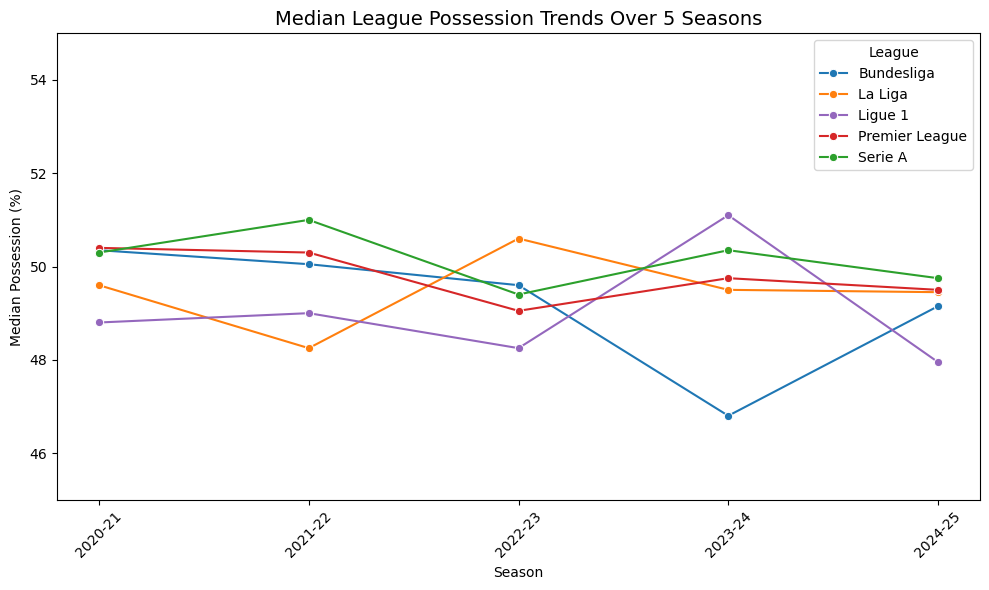

In [216]:
league_colors = {
    "Premier League": "#d62728", 
    "La Liga": "#ff7f0e",         
    "Bundesliga": "#1f77b4",      
    "Serie A": "#2ca02c",          
    "Ligue 1": "#9467bd"}

plt.figure(figsize=(10,6))
sns.lineplot(
    data=league_season_trends,
    x='Season',
    y='Avg_Possession',
    hue='League',
    marker='o',
    palette=league_colors)

plt.title("Median League Possession Trends Over 5 Seasons", fontsize=14)
plt.ylabel("Median Possession (%)")
plt.xlabel("Season")
plt.ylim(45, 55) 
plt.xticks(rotation=45)
plt.legend(title='League')
plt.tight_layout()
plt.show()

In [111]:
league_mean = avg_possession_by_league.groupby('League')['Avg_Possession'].mean().reset_index()
league_median = avg_possession_by_league.groupby('League')['Avg_Possession'].median().reset_index()

league_summary = league_mean.merge(league_median, on='League')
league_summary.rename(columns={'Avg_Possession_x': 'Mean_Possession',
                                'Avg_Possession_y': 'Median_Possession'}, inplace=True)

league_max = avg_possession_by_league.groupby('League')['Avg_Possession'].max().reset_index()
league_min = avg_possession_by_league.groupby('League')['Avg_Possession'].min().reset_index()

league_range = league_max.merge(league_min, on='League')
league_range['Possession_Range'] = league_range['Avg_Possession_x'] - league_range['Avg_Possession_y']
league_range.rename(columns={'Avg_Possession_x': 'Max_Possession','Avg_Possession_y': 'Min_Possession'}, inplace=True)

league_possession_analysis = league_summary.merge(league_range[['League','Max_Possession','Min_Possession','Possession_Range']], on='League')

print(league_possession_analysis)

           League  Mean_Possession  Median_Possession  Max_Possession  \
0      Bundesliga        48.584583          46.612500           63.72   
1         La Liga        49.329630          49.300000           65.32   
2         Ligue 1        48.738462          47.533333           64.00   
3  Premier League        48.056173          47.000000           64.52   
4         Serie A        49.010179          48.516667           58.14   

   Min_Possession  Possession_Range  
0       41.500000         22.220000  
1       40.325000         24.995000  
2       41.233333         22.766667  
3       37.900000         26.620000  
4       42.100000         16.040000  


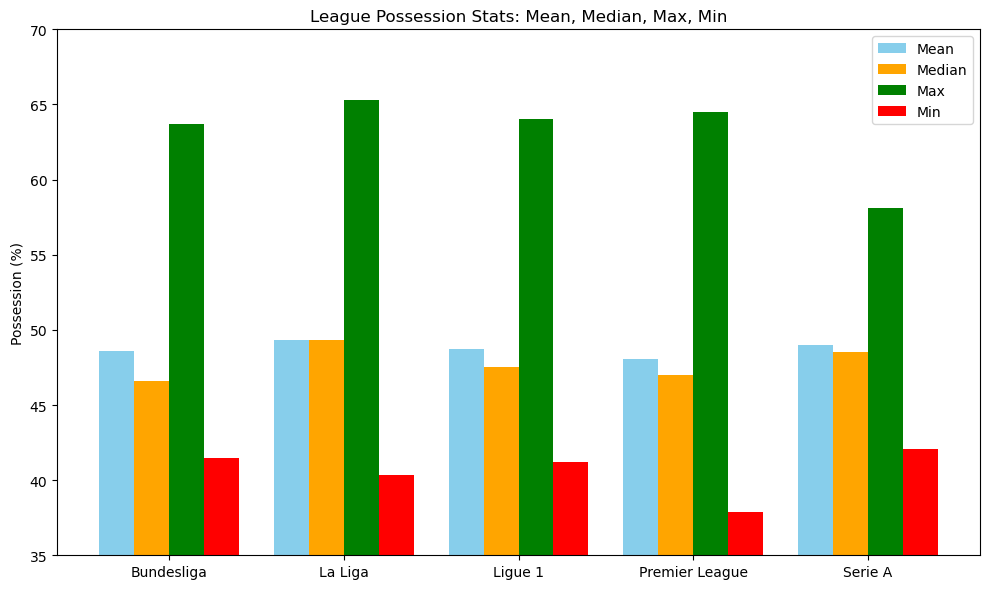

In [112]:
plt.figure(figsize=(10,6))

bar_width = 0.2
leagues = league_possession_analysis['League']
x = range(len(leagues))

plt.bar([p - 1.5*bar_width for p in x], league_possession_analysis['Mean_Possession'], width=bar_width, label='Mean', color='skyblue')
plt.bar([p - 0.5*bar_width for p in x], league_possession_analysis['Median_Possession'], width=bar_width, label='Median', color='orange')
plt.bar([p + 0.5*bar_width for p in x], league_possession_analysis['Max_Possession'], width=bar_width, label='Max', color='green')
plt.bar([p + 1.5*bar_width for p in x], league_possession_analysis['Min_Possession'], width=bar_width, label='Min', color='red')


plt.xticks(x, leagues)
plt.ylabel('Possession (%)')
plt.title('League Possession Stats: Mean, Median, Max, Min')
plt.ylim(35, 70)
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
pl_df.head(2)

,Squad,Poss,90s,Gls,Ast,G_plus_A,G_minus_PK,xG,xAG,xG_plus_xAG,npxG_plus_xAG,PrgC,PrgP,CrdY,CrdR,Season,League,League_ID
0,Arsenal,56.9,38,1.76,1.45,3.21,1.71,1.58,1.19,2.77,2.73,852,1826,70,6,2024-25,Premier League,1
1,Aston Villa,50.5,38,1.47,1.18,2.66,1.39,1.48,1.10,2.57,2.45,720,1344,76,4,2024-25,Premier League,1


In [164]:
### ATTACKING STATS ###

In [116]:
league_goals_avg = complete_table_df.groupby("League")["Gls"].mean().sort_values(ascending=False)
print(league_goals_avg)

League
Bundesliga        1.525444
Premier League    1.405500
Ligue 1           1.362813
Serie A           1.322800
La Liga           1.242000
Name: Gls, dtype: float64


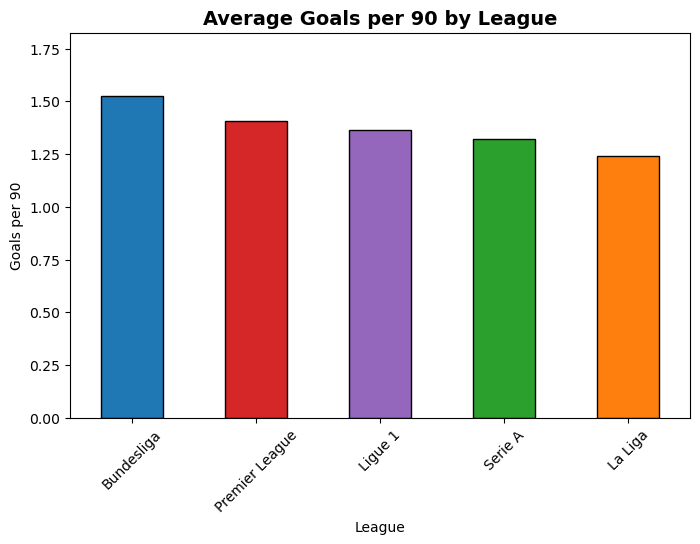

In [217]:
league_colors = {
    "Premier League": "#d62728", 
    "La Liga": "#ff7f0e",         
    "Bundesliga": "#1f77b4",      
    "Serie A": "#2ca02c",          
    "Ligue 1": "#9467bd"}

colors = [league_colors[league] for league in league_goals_avg.index]

plt.figure(figsize=(8,5))
league_goals_avg.plot(
    kind="bar", 
    color=colors,     
    edgecolor="black")

plt.title("Average Goals per 90 by League", fontsize=14, fontweight="bold")
plt.ylabel("Goals per 90")
plt.xlabel("League")
plt.xticks(rotation=45)
plt.ylim(0, league_goals_avg.max() + 0.3)
plt.show()

In [127]:
complete_table_df["goal_efficiency"] = complete_table_df["Gls"] / complete_table_df["xG"]